#Import Data from Kaggle

In [1]:
!pip install --upgrade kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ninahidayah","key":"15a37dc28ee75571c3c2273fb299e5c7"}'}

In [4]:
!dir

kaggle.json  sample_data


In [5]:
import pandas as pd
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [6]:
!kaggle datasets download -d danielgrijalvas/movies

Dataset URL: https://www.kaggle.com/datasets/danielgrijalvas/movies
License(s): CC0-1.0
  0% 0.00/424k [00:00<?, ?B/s]
100% 424k/424k [00:00<00:00, 419MB/s]


In [7]:
!unzip *.zip

Archive:  movies.zip
  inflating: movies.csv              


In [8]:
data = pd.read_csv('movies.csv')

In [9]:
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


#Handle Missing Value

Disclaimer, we can handle Missing Values according to business needs

but in my project this time, I only want to handle missing values

In [10]:
data1 = data.copy()

In [11]:
data1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [12]:
data1.shape

(7668, 15)

In [13]:
data1['released'].unique()

array(['June 13, 1980 (United States)', 'July 2, 1980 (United States)',
       'June 20, 1980 (United States)', ...,
       'October 23, 2020 (United States)', 'April 27, 2020 (Cameroon)',
       'August 19, 2020 (United States)'], dtype=object)

Check data type

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [15]:
data1.isnull()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


In [16]:
data1.isnull().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


In [17]:
# view presentase missing value
round(data1.isnull().sum()/data1.shape[0]*100, 2)

,0
name,0.00
rating,1.00
genre,0.00
year,0.00
released,0.03
score,0.04
votes,0.04
director,0.00
writer,0.04
star,0.01


##Budget Column

Chek distribution data

<Axes: xlabel='budget', ylabel='Count'>

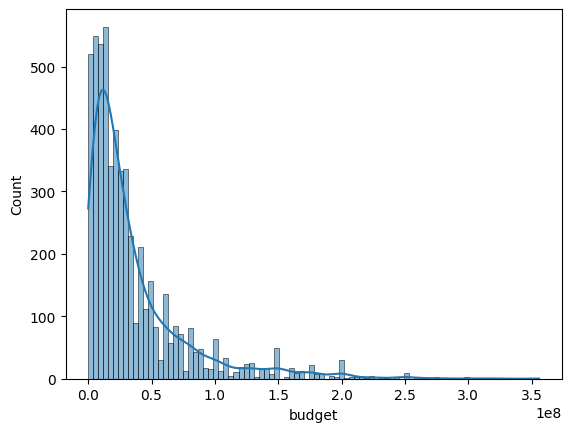

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data1['budget'], kde = True)

Result data Right-Skewed

In [19]:
data1['budget'].describe()

,budget
count,5.497000e+03
mean,3.558988e+07
std,4.145730e+07
min,3.000000e+03
25%,1.000000e+07
50%,2.050000e+07
75%,4.500000e+07
max,3.560000e+08


fill missing values with grouped Median

In [20]:
data1['budget'] = data1.groupby('genre')['budget'].transform(lambda x: x.fillna(x.median()))

In [21]:
data1['budget'].isnull().sum()

np.int64(4)

Next fill missing values with global median

In [22]:
median_budget = data1['budget'].median()

In [23]:
data1['budget'].fillna(median_budget, inplace = True)

/tmp/ipython-input-23-3150013388.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['budget'].fillna(median_budget, inplace = True)


In [24]:
data1['budget'].isnull().sum()

np.int64(0)

##Rating Column

fill in missing values with imputation using mode

In [25]:
# melihat nilai modus dari kolom rating
data['rating'].mode()

,rating
0,R


In [26]:
mode_rating = data1['rating'].mode()[0]

In [27]:
data1['rating'].fillna(mode_rating, inplace =True)

/tmp/ipython-input-27-3406430393.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['rating'].fillna(mode_rating, inplace =True)


In [28]:
data1['rating'].isnull().sum()

np.int64(0)

## Gross Column

<Axes: xlabel='gross', ylabel='Count'>

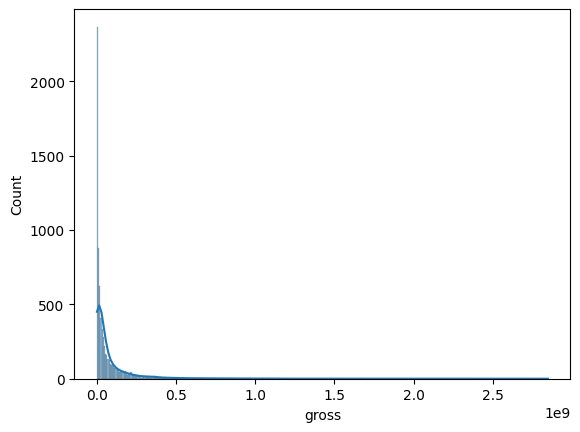

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data1['gross'], kde = True)

In [30]:
data1['gross'].describe()

,gross
count,7.479000e+03
mean,7.850054e+07
std,1.657251e+08
min,3.090000e+02
25%,4.532056e+06
50%,2.020576e+07
75%,7.601669e+07
max,2.847246e+09


fill in missing values with imputation using median

In [31]:
median_gross = data1['gross'].median()

In [32]:
data1['gross'].fillna(median_gross, inplace = True)

/tmp/ipython-input-32-68848955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['gross'].fillna(median_gross, inplace = True)


In [33]:
data1['gross'].isnull().sum()

np.int64(0)

In [34]:
round(data1.isnull().sum()/data1.shape[0]*100, 2)

,0
name,0.00
rating,0.00
genre,0.00
year,0.00
released,0.03
score,0.04
votes,0.04
director,0.00
writer,0.04
star,0.01


In [38]:
data1.to_csv('data_clear.csv', index=False)

In [39]:
from google.colab import files
files.download('data_clear.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>